<a href="https://colab.research.google.com/github/Rtarachan02/Machine-Learning-Projects/blob/main/StreamPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Mounting Drive

In [41]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing (Dont Run this part Again)

### Preprocessing Data1 (Flow,Tavg,Precipitation)

In [ ]:
path1='/content/drive/My Drive/StreamPrediction/Project data.csv'
data1=pd.read_csv(path1)
data1.head()

,Dates,Current Year (Flow),precipitation,Tavg
0,1/1/1992,10.240,0.0,19.120
1,1/2/1992,8.665,0.0,16.625
2,1/3/1992,8.437,0.0,17.020
3,1/4/1992,7.759,0.0,16.975
4,1/5/1992,8.160,0.0,17.890


In [ ]:
data1.tail(10)

,Dates,Current Year (Flow),precipitation,Tavg
9852,NaN,NaN,0.0,19.09210
9853,NaN,NaN,0.0,19.94515
9854,NaN,NaN,0.0,20.48325
9855,NaN,NaN,0.0,21.23175
9856,NaN,NaN,0.0,22.03910
9857,NaN,NaN,0.0,20.32660
9858,NaN,NaN,0.0,17.52235
9859,NaN,NaN,0.0,16.47450
9860,NaN,NaN,0.0,16.97485
9861,NaN,NaN,0.0,17.83350


In [ ]:
# Generate a date range from 1992-01-01 to 2018-12-31
date_range = pd.date_range(start='1992-01-01', end='2018-12-31', freq='D')
dates_df = pd.DataFrame(date_range, columns=['Date'])
print(len(date_range))
print(len(dates_df) == len(data1))
data1_with_dates = pd.concat([dates_df,data1.reset_index(drop=True)], axis=1)
data1_with_dates.tail()

9862
True


,Date,Dates,Current Year (Flow),precipitation,Tavg
9857,2018-12-27,NaN,NaN,0.0,20.32660
9858,2018-12-28,NaN,NaN,0.0,17.52235
9859,2018-12-29,NaN,NaN,0.0,16.47450
9860,2018-12-30,NaN,NaN,0.0,16.97485
9861,2018-12-31,NaN,NaN,0.0,17.83350


In [ ]:
data1_filtered=data1_with_dates.drop(columns=['Date','Dates'])

In [ ]:
data1_filtered.tail()

,Current Year (Flow),precipitation,Tavg
9857,NaN,0.0,20.32660
9858,NaN,0.0,17.52235
9859,NaN,0.0,16.47450
9860,NaN,0.0,16.97485
9861,NaN,0.0,17.83350


In [ ]:
pathp1='/content/drive/My Drive/StreamPrediction/Preprocessed/fprtavg.csv'
data1_filtered.to_csv(pathp1,index=False)

### Preprocessing Data2 (Soil Moisture)

In [ ]:
path2='/content/drive/My Drive/StreamPrediction/soil_moisture_data.csv'
data2=pd.read_csv(path2)
data2.head()

,V1420,V1528,V1638,V1748,V1749,V1857,V1858,V1859,V1968,V1969,...,V2616,V2617,V2709,V2710,V2711,V2712,V2713,V2804,V2805,V2898
0,0.556211,0.565086,0.553290,0.563932,0.515059,0.500734,0.544147,0.487641,0.395432,0.437123,...,0.555125,0.553608,0.433478,0.562774,0.580445,0.532743,0.505439,0.491134,0.571692,0.552480
1,0.550833,0.560403,0.549749,0.560835,0.512305,0.497653,0.540928,0.484558,0.393166,0.433609,...,0.549743,0.548353,0.432293,0.563139,0.580305,0.532036,0.504838,0.488696,0.570371,0.550498
2,0.540864,0.549360,0.539770,0.552114,0.503918,0.487820,0.532614,0.476937,0.385218,0.426899,...,0.542972,0.539757,0.429442,0.561627,0.577795,0.529653,0.502504,0.486057,0.568175,0.547157
3,0.532153,0.540772,0.530755,0.544341,0.496249,0.479338,0.525339,0.469417,0.378268,0.421277,...,0.538073,0.533583,0.424759,0.557822,0.573792,0.525929,0.497942,0.483063,0.565664,0.543950
4,0.530096,0.539156,0.528448,0.541025,0.493440,0.476702,0.522360,0.467210,0.377275,0.420489,...,0.537224,0.531476,0.422331,0.555824,0.570393,0.522677,0.495228,0.481000,0.564122,0.543073


In [ ]:
data2.shape

(22646, 66)

In [ ]:
# Generate a date range from 1960-01-01 to 2022-12-31
date_range = pd.date_range(start='1960-01-01', end='2021-12-31', freq='D')
dates_df = pd.DataFrame(date_range, columns=['Date'])
print(len(date_range))
print(len(dates_df) == len(data2))
data2_with_dates = pd.concat([dates_df,data2.reset_index(drop=True)], axis=1)
data2_with_dates.tail()

22646
True


,Date,V1420,V1528,V1638,V1748,V1749,V1857,V1858,V1859,V1968,...,V2616,V2617,V2709,V2710,V2711,V2712,V2713,V2804,V2805,V2898
22641,2021-12-27,0.529633,0.545488,0.549116,0.553657,0.517227,0.494082,0.529878,0.486839,0.401894,...,0.538757,0.534465,0.421512,0.521367,0.514663,0.478769,0.483048,0.465115,0.532356,0.525535
22642,2021-12-28,0.529376,0.545933,0.549794,0.554743,0.517522,0.495624,0.532409,0.488403,0.404000,...,0.542545,0.536732,0.420941,0.522569,0.516654,0.480808,0.484742,0.465059,0.533350,0.526481
22643,2021-12-29,0.533225,0.549749,0.554128,0.558181,0.521658,0.498199,0.534634,0.491023,0.405790,...,0.546672,0.540926,0.420694,0.523003,0.517059,0.482811,0.487901,0.466469,0.534957,0.531468
22644,2021-12-30,0.541355,0.556590,0.562197,0.564278,0.530036,0.504621,0.540382,0.497606,0.411857,...,0.552035,0.547000,0.424273,0.528090,0.521975,0.487618,0.492427,0.471139,0.540625,0.536737
22645,2021-12-31,0.548009,0.562517,0.567172,0.567779,0.534652,0.510275,0.545500,0.502652,0.417024,...,0.555248,0.550441,0.424893,0.529753,0.523463,0.489016,0.493783,0.472652,0.543634,0.538970


In [ ]:
filtered_data = data2_with_dates[(data2_with_dates['Date'] >= '1992-01-01') & (data2_with_dates['Date'] <= '2018-12-31')]

# Display the number of rows after filtering
print(f"Rows after filtering: {len(filtered_data)}")

# Optionally, you can reset the index after filtering
filtered_data = filtered_data.reset_index(drop=True)

# Display the filtered data (first few rows)
filtered_data.head()

Rows after filtering: 9862


,Date,V1420,V1528,V1638,V1748,V1749,V1857,V1858,V1859,V1968,...,V2616,V2617,V2709,V2710,V2711,V2712,V2713,V2804,V2805,V2898
0,1992-01-01,0.579018,0.577740,0.578117,0.576810,0.542215,0.508218,0.554860,0.510900,0.413858,...,0.560474,0.578073,0.439769,0.540862,0.538488,0.496918,0.486920,0.498616,0.558833,0.560593
1,1992-01-02,0.580251,0.579140,0.579574,0.577194,0.543539,0.507664,0.555064,0.512101,0.413295,...,0.559794,0.577647,0.435353,0.537048,0.534632,0.494022,0.485178,0.492685,0.554284,0.553701
2,1992-01-03,0.580109,0.579919,0.580131,0.578652,0.544534,0.508625,0.556279,0.513564,0.413471,...,0.559163,0.576406,0.433496,0.536370,0.533822,0.493308,0.484500,0.490043,0.553148,0.550789
3,1992-01-04,0.573832,0.574243,0.574507,0.575276,0.540020,0.505704,0.553185,0.509778,0.410190,...,0.553842,0.569553,0.430478,0.534567,0.532229,0.491176,0.481476,0.487568,0.551363,0.548635
4,1992-01-05,0.568913,0.569309,0.570118,0.572618,0.536817,0.503793,0.551224,0.507221,0.408782,...,0.549351,0.563343,0.428545,0.533628,0.531517,0.489991,0.479030,0.485773,0.550164,0.547889


In [ ]:
filtered_data=filtered_data.drop(columns=['Date'])
filtered_data['Avgsm'] = filtered_data.mean(axis=1)
filtered_data=filtered_data['Avgsm']
# Display the first few rows to check the new column
filtered_data.head()

,Avgsm
0,0.510648
1,0.509485
2,0.509254
3,0.505741
4,0.503331


In [ ]:
filtered_data.shape

(9862,)

In [ ]:
pathp2='/content/drive/My Drive/StreamPrediction/Preprocessed/avgsm.csv'
filtered_data.to_csv(pathp2,index=False)

## LSTM MODEL

In [3]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

class LSTMModel:
    def __init__(self, time_step=30, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=20, batch_size=32):
        """
        Initialize the LSTM model class with given parameters.

        Parameters:
        - time_step: Number of previous time steps to predict the next value.
        - units: Number of LSTM units in each LSTM layer.
        - dropout_rate: Dropout rate for regularization.
        - learning_rate: Learning rate for Adam optimizer.
        - epochs: Number of epochs to train the model.
        - batch_size: Batch size used in training.
        """
        self.time_step = time_step
        self.units = units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.scaler = None

    def prepare_data(self, data):
        """
        Prepare the data for training.
        This will scale the data and generate sequences for LSTM input.

        Parameters:
        - data: DataFrame containing the dataset (independent features and output).

        Returns:
        - X_train, X_test, y_train, y_test: Training and testing sets.
        """
        # Normalize the data
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = self.scaler.fit_transform(data)

        # Create sequences for LSTM input
        X, y = self.create_sequences(scaled_data)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        return X_train, X_test, y_train, y_test

    def create_sequences(self, data):
      """
    Create sequences from the data to use as input for the LSTM model.

    Parameters:
    - data: Scaled data (features and output).

    Returns:
    - X, y: Sequences of features and corresponding output values.
      """
    # Assuming data is a pandas DataFrame
      X_data = data[:, :-1]  # All columns except the last one (features)
      Y_data = data[:, -1]   # The last column (target)

      X, y = [], []
      for i in range(len(data) - self.time_step):
         X.append(X_data[i:(i + self.time_step)])  # Features for the sequence
         y.append(Y_data[i + self.time_step])  # Output for the sequence

      return np.array(X), np.array(y)
    def build_model(self, input_shape):
        """
        Build and compile the LSTM model.

        Parameters:
        - input_shape: Shape of the input data (number of time steps and number of features).
        """
        self.model = Sequential()
        self.model.add(LSTM(units=self.units, return_sequences=True, input_shape=input_shape))
        self.model.add(Dropout(self.dropout_rate))

        self.model.add(LSTM(units=self.units, return_sequences=False))
        self.model.add(Dropout(self.dropout_rate))

        # Adding the Dense layer for output
        self.model.add(Dense(units=1,activation='sigmoid'))  # Single output value

        # Compile the model
        self.model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mean_squared_error')

    def train_model(self, X_train, y_train, X_test, y_test):
        """
        Train the LSTM model on the training data.

        Parameters:
        - X_train: Input features for training.
        - y_train: Output values for training.
        - X_test: Input features for testing.
        - y_test: Output values for testing.

        Returns:
        - history: Training history object containing loss values.
        """
        history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size,
                                 validation_data=(X_test, y_test))
        return history

    def predict(self, X_test):
        """
        Predict using the trained LSTM model.

        Parameters:
        - X_test: Input features for testing.

        Returns:
        - predictions: Model predictions for the test data.
        """
        predictions = self.model.predict(X_test)
        predictions_extended = np.column_stack((np.zeros((predictions.shape[0],2 )), predictions))
        predictions_rescaled = self.scaler.inverse_transform(predictions_extended)[:, -1]  # Extract the flow values column

        return predictions_rescaled

## Load Data and Train Model

Dont touch this code below just run it .

In [14]:
p1='/content/drive/My Drive/StreamPrediction/Preprocessed/fprtavg.csv'
fprtavg=pd.read_csv(p1)
p2='/content/drive/My Drive/StreamPrediction/Preprocessed/avgsm.csv'
avgsm=pd.read_csv(p2)
merged_df = pd.concat([fprtavg, avgsm], axis=1)
new_order = ['precipitation','Tavg','Avgsm','Current Year (Flow)']
merged_df = merged_df[new_order]
# Define the new column names (assuming you know the desired order of columns)
new_column_names = ['pr','tavg','sm','flow']  # Example names
merged_df.columns = new_column_names
merged_df.head()

,pr,tavg,sm,flow
0,0.0,19.120,0.510648,10.240
1,0.0,16.625,0.509485,8.665
2,0.0,17.020,0.509254,8.437
3,0.0,16.975,0.505741,7.759
4,0.0,17.890,0.503331,8.160


No need to train again(Optional), load trained model and use to save time

In [15]:
data = merged_df # Replace with your actual data
 # Create the LSTM model object
lstm_model = LSTMModel(time_step=30, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=200, batch_size=32)
# Prepare data
X_train, X_test, y_train, y_test = lstm_model.prepare_data(data[['pr', 'tavg', 'flow']])
# Build the model
# lstm_model.build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
# Train the model
# history = lstm_model.train_model(X_train, y_train, X_test, y_test)
# Make predictions
# y_pred = lstm_model.predict(X_test)
# Optionally, you can compare y_pred with y_test
# print("Predictions:", y_pred[:5])  # Display first 5 predictions

MODEL EVALUATION

In [ ]:
from tensorflow.keras.models import load_model
model_path='/content/drive/My Drive/StreamPrediction/my_lstm_model.keras'
# Load the saved model
model = load_model(model_path)
# Use the model
y_pred = model.predict(X_test)
print(y_pred)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[[0.12826023]
 [0.20150502]
 [0.248064  ]
 ...
 [0.00086025]
 [0.00085001]
 [0.00084189]]


In [ ]:
# prompt: code to analyse MSE ,MAE, R, R^2,NSE of this
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values

# Rescale y_test and y_pred to their original scale (if necessary)
y_test_original = lstm_model.scaler.inverse_transform(np.column_stack((np.zeros((y_test.shape[0], 2)), y_test)))[:, -1]
y_pred_original = lstm_model.scaler.inverse_transform(np.column_stack((np.zeros((y_pred.shape[0], 2)), y_pred)))[:, -1]
# y_test_original=y_test[~np.isnan(y_test)].flatten()
# y_pred_original = y_pred[:len(y_test_original)].flatten()
y_test_original=y_test_original[:1500]
y_pred_original = y_pred_original[:1500]
print(y_pred_original)
print(y_test_original)
# Calculate MSE
mse = mean_squared_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test_original, y_pred_original)
print("Mean Absolute Error (MAE):", mae)
# Calculate NSE (Nash-Sutcliffe efficiency)
numerator = np.sum((y_test_original - y_pred_original)**2)
denominator = np.sum((y_test_original - np.mean(y_test_original))**2)
nse = 1 - (numerator / denominator)
print("Nash-Sutcliffe Efficiency (NSE):", nse)

# Calculate Pearson's correlation coefficient
correlation_matrix = np.corrcoef(y_test_original, y_pred_original)
correlation_xy = correlation_matrix[0, 1]
r_value = correlation_xy
print("Pearson's Correlation Coefficient (R):", r_value)

[1807.95613241 2840.4147656  3496.71009374 ...  740.90899289  776.70253754
  485.35002613]
[2594.9429  2399.1794  1195.7113  ...   16.79471   15.99767   14.16   ]
Mean Squared Error (MSE): 1008621.2578019662
Mean Absolute Error (MAE): 334.32511301035356
Nash-Sutcliffe Efficiency (NSE): -0.8220590851936935
Pearson's Correlation Coefficient (R): 0.13963827409058602


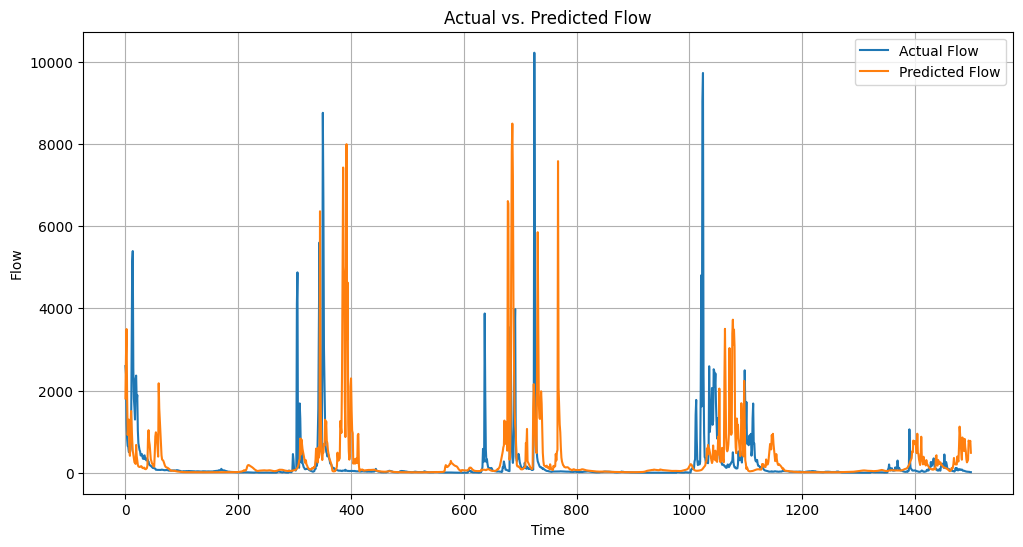

In [ ]:
# prompt: plot for y_pred and y_test original

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Flow')
plt.plot(y_pred_original, label='Predicted Flow')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Actual vs. Predicted Flow')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: code to save above model using kera format

# Save the model in Keras format
lstm_model.model.save('/content/drive/My Drive/StreamPrediction/my_lstm_model.keras')

## Forecast for GCM Data1

Preprocess GCM1 Data and form sequence

In [5]:
#fetching the GCMs1 Data
path3='/content/drive/My Drive/StreamPrediction/GCM Data/accesscm2.csv'
data3=pd.read_csv(path3)
data3.head()

,Date,precipitation,temperature
0,01-01-2025,1.001061,24.773561
1,02-01-2025,1.575606,25.658030
2,03-01-2025,1.504242,26.138333
3,04-01-2025,0.799091,26.057197
4,05-01-2025,0.868636,26.135682


In [6]:
print(data3.shape)#(found data from 01 jan 2025 to 10 dec 2100)
data3.tail()

(27737, 3)


,Date,precipitation,temperature
27732,06-12-2100,0.000000,25.199091
27733,07-12-2100,0.032727,25.082197
27734,08-12-2100,0.888030,25.404167
27735,09-12-2100,0.000000,24.844924
27736,10-12-2100,0.000000,24.374091


In [7]:
#droping the date column for a while
data3=data3[['precipitation','temperature']]
data3.head()

,precipitation,temperature
0,1.001061,24.773561
1,1.575606,25.658030
2,1.504242,26.138333
3,0.799091,26.057197
4,0.868636,26.135682


In [9]:
from tensorflow.keras.models import load_model
model_path='/content/drive/My Drive/StreamPrediction/my_lstm_model.keras'
# Load the saved model
model = load_model(model_path)


In [20]:
%%capture
#predict the output using the above model
import time
# t1=time.time()

# Scale the GCM data using the same scaler as the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_GCM_data = scaler.fit_transform(data3)

# Create sequences for prediction (similar to create_sequences in LSTMModel)
X_GCM = []
time_step=30
for i in range(len(scaled_GCM_data) - time_step):
    X_GCM.append(scaled_GCM_data[i:(i + time_step)])
X_GCM = np.array(X_GCM)

# Make predictions for all sequences
predGCM1 = []
for   i in range(len(X_GCM)):
    seq = X_GCM[i]
    predGCM1.extend(model.predict(seq.reshape(1, seq.shape[0], seq.shape[1])))
predGCM1 = np.array(predGCM1)
predGCM1=lstm_model.scaler.inverse_transform(np.column_stack((np.zeros((predGCM1.shape[0], 2)), predGCM1)))[:, -1]
predGCM1=pd.DataFrame(predGCM1)
predGCM1.head()
date_range = pd.date_range(start='2025-01-30', end='2100-12-10', freq='D')
dates_df = pd.DataFrame(date_range, columns=['Date'])
print(len(date_range))
print(len(dates_df) == len(predGCM1))
predGCM1_with_dates = pd.concat([dates_df,predGCM1.reset_index(drop=True)], axis=1)
pathn3='/content/drive/My Drive/StreamPrediction/Forecast/Runoff_GCM1.csv'
predGCM1.to_csv(pathn3,index=False)

In [23]:
predGCM1_with_dates.to_csv(pathn3,index=False)

## Forecast for GCM Data2

In [24]:
#fetching the GCMs1 Data
path4='/content/drive/My Drive/StreamPrediction/GCM Data/IN-CM5.csv'
data4=pd.read_csv(path4)
data4.head()

,date,precipitation,Temperatue
0,01-01-2025,0.0,21.100909
1,02-01-2025,0.0,22.239318
2,03-01-2025,0.0,23.720000
3,04-01-2025,0.0,25.181212
4,05-01-2025,0.0,25.627500


In [25]:
print(data4.shape)#(found data from 01 jan 2025 to 10 dec 2100)
data4.tail()

(27737, 3)


,date,precipitation,Temperatue
27732,06-12-2100,0.001515,23.625303
27733,07-12-2100,0.690152,22.723561
27734,08-12-2100,0.000000,22.465530
27735,09-12-2100,0.040000,21.745682
27736,10-12-2100,0.000000,20.250000


In [32]:
#droping the date column for a while
data4=data4[['precipitation','Temperatue']]
data4.head()

,precipitation,Temperatue
0,0.0,21.100909
1,0.0,22.239318
2,0.0,23.720000
3,0.0,25.181212
4,0.0,25.627500


In [33]:
from tensorflow.keras.models import load_model
model_path='/content/drive/My Drive/StreamPrediction/my_lstm_model.keras'
# Load the saved model
model = load_model(model_path)


In [37]:
%%capture
#predict the output using the above model
import time
t1=time.time()

# Scale the GCM data using the same scaler as the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_GCM_data = scaler.fit_transform(data4)

# Create sequences for prediction (similar to create_sequences in LSTMModel)
X_GCM = []
time_step=30
for i in range(len(scaled_GCM_data) - time_step):
    X_GCM.append(scaled_GCM_data[i:(i + time_step)])
X_GCM = np.array(X_GCM)

# Make predictions for all sequences
predGCM2 = []
for   i in range(len(X_GCM)):
    seq = X_GCM[i]
    predGCM2.extend(model.predict(seq.reshape(1, seq.shape[0], seq.shape[1])))
predGCM2 = np.array(predGCM2)
predGCM2=lstm_model.scaler.inverse_transform(np.column_stack((np.zeros((predGCM2.shape[0], 2)), predGCM2)))[:, -1]
predGCM2=pd.DataFrame(predGCM2)
predGCM2.head()
date_range = pd.date_range(start='2025-01-30', end='2100-12-10', freq='D')
dates_df = pd.DataFrame(date_range, columns=['Date'])
print(len(date_range))
print(len(dates_df) == len(predGCM2))
predGCM2_with_dates = pd.concat([dates_df,predGCM2.reset_index(drop=True)], axis=1)
pathn4='/content/drive/My Drive/StreamPrediction/Forecast/Runoff_GCM2.csv'
predGCM2.to_csv(pathn4,index=False)

In [38]:
predGCM2_with_dates.to_csv(pathn4,index=False)

## Comparision of Both Predictions

In [42]:
fpath1='/content/drive/My Drive/StreamPrediction/Forecast/Runoff_GCM1.csv'
fpath2='/content/drive/My Drive/StreamPrediction/Forecast/Runoff_GCM2.csv'
predGCM1=pd.read_csv(fpath1)
predGCM2=pd.read_csv(fpath2)

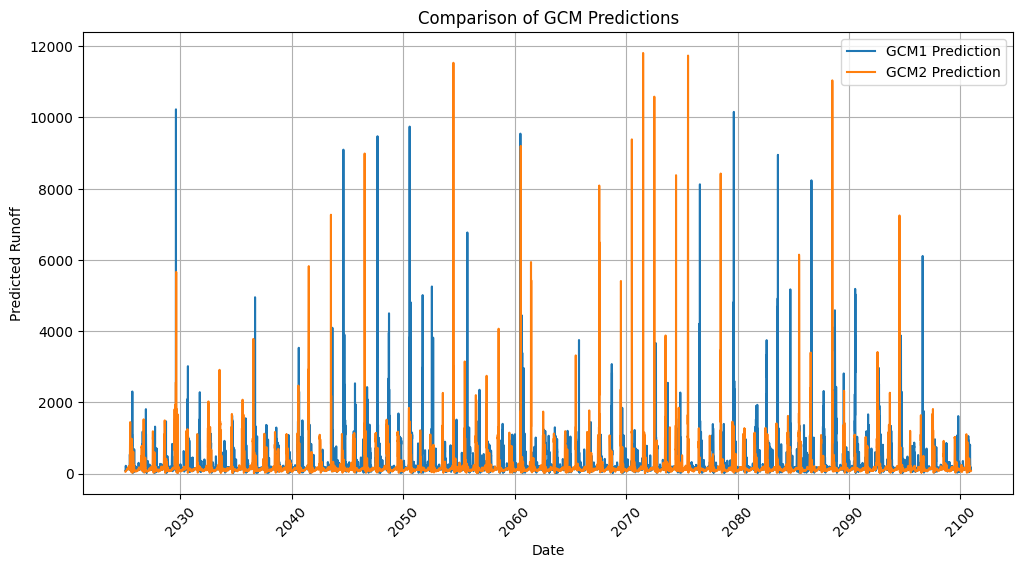

In [50]:
# prompt: i wanna plot this two data x axis as date , date range from 30 jan 2025 to 10dec 2100

import matplotlib.pyplot as plt

# Assuming predGCM1 and predGCM2 are your DataFrames with 'Date' and '0' columns
# and the dates are in the 'Date' column in datetime format
# Replace predGCM1 and predGCM2 with your actual DataFrames

# Convert the 'Date' column to datetime objects
predGCM1['Date'] = pd.to_datetime(predGCM1['Date'])
predGCM2['Date'] = pd.to_datetime(predGCM2['Date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(predGCM1['Date'], predGCM1['0'], label='GCM1 Prediction')
plt.plot(predGCM2['Date'], predGCM2['0'], label='GCM2 Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Runoff')
plt.title('Comparison of GCM Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Experiment

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
# Assuming predGCM1 and predGCM2 are your DataFrames with 'Date' and '0' columns
# Convert the 'Date' column to datetime objects if not already
predGCM1['Date'] = pd.to_datetime(predGCM1['Date'])
predGCM2['Date'] = pd.to_datetime(predGCM2['Date'])

# Calculate the number of intervals
total_days = (predGCM1['Date'].iloc[-1] - predGCM1['Date'].iloc[0]).days
intervals = total_days // 30  # This computes how many full 30-day intervals are in your data range

# Iterate over each 30-day interval
for i in range(intervals + 1):  # +1 to include any remaining days in the last interval
    start_date = predGCM1['Date'].iloc[0] + pd.DateOffset(days=30 * i)
    end_date = start_date + pd.DateOffset(days=29)

    # Check if the current window exceeds the dataset's bounds and adjust
    if end_date > predGCM1['Date'].iloc[-1]:
        end_date = predGCM1['Date'].iloc[-1]

    # Filter the data for the current 30-day window
    gcm1_data_window = predGCM1[(predGCM1['Date'] >= start_date) & (predGCM1['Date'] <= end_date)]
    gcm2_data_window = predGCM2[(predGCM2['Date'] >= start_date) & (predGCM2['Date'] <= end_date)]

    # Plot the data for the current window
    plt.figure(figsize=(12, 6))
    plt.plot(gcm1_data_window['Date'], gcm1_data_window['0'], label='GCM1 Prediction')
    plt.plot(gcm2_data_window['Date'], gcm2_data_window['0'], label='GCM2 Prediction')
    plt.xlabel('Date')
    plt.ylabel('Predicted Runoff')
    plt.title(f'Comparison of GCM Predictions from {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
    clear_output(wait=True)


    # Break if the last interval has been reached and it's less than 30 days
    if end_date == predGCM1['Date'].iloc[-1]:
        break


KeyboardInterrupt: 